<a href="https://colab.research.google.com/github/AaravWattal/RRAM-Models/blob/main/(RESET)_1_12_23_MDN_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Datasets


In [1]:
# Imports
import numpy as np
import pandas as pd
from time import time

# Scikit-learn stuff
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [2]:
# Get conductange range data from file set_sweep.csv
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/reset_sweep.tsv", sep='\t', names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,9726.189563,10018.123665
1,2,2.000000e-08,0.5,1.0,9867.379098,9836.066607
2,4,2.000000e-08,0.5,1.5,9773.081709,9902.969536
3,6,2.000000e-08,0.5,2.0,9555.136969,9373.063191
4,8,2.000000e-08,0.5,2.5,9598.105929,9840.417267
5,10,2.000000e-08,0.5,3.0,10154.120560,10130.418229
6,12,2.000000e-08,0.6,0.5,9576.502084,9832.650784
7,14,2.000000e-08,0.6,1.0,8517.708010,8714.310288
8,16,2.000000e-08,0.6,1.5,8885.389926,9046.957580
9,18,2.000000e-08,0.6,2.0,8513.328536,8321.666349


In [3]:
# data = pd.read_csv("/content/reset_sweep.tsv", sep='\t', names=names)
# data.head(20)

# Data Preprocessing

Let us first convert resistance values (pre-read and post-read) to conductance values, and scale each column so that the maximum value is 1.

In [4]:
# Convert resistance to conductance
data['preread'] = 1 / data['preread']
data['postread'] = 1 / data['postread']

In [5]:
# Creating scaled versions of the columns which have very large or very small scales
data['scaled_pw'] = data['pw'] / np.max(data['pw'])
data['scaled_preread'] = data['preread'] / np.max(data['preread'])
data['scaled_postread'] = data['postread'] / np.max(data['postread'])

In [6]:
# Take a peek at the preprocessed data
data.head(20)

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
0,0,2.000000e-08,0.5,0.5,0.000103,0.000100,0.01,0.652873,0.602074
1,2,2.000000e-08,0.5,1.0,0.000101,0.000102,0.01,0.643531,0.613218
2,4,2.000000e-08,0.5,1.5,0.000102,0.000101,0.01,0.649740,0.609075
3,6,2.000000e-08,0.5,2.0,0.000105,0.000107,0.01,0.664560,0.643509
4,8,2.000000e-08,0.5,2.5,0.000104,0.000102,0.01,0.661585,0.612947
5,10,2.000000e-08,0.5,3.0,0.000098,0.000099,0.01,0.625358,0.595400
6,12,2.000000e-08,0.6,0.5,0.000104,0.000102,0.01,0.663077,0.613431
7,14,2.000000e-08,0.6,1.0,0.000117,0.000115,0.01,0.745501,0.692155
8,16,2.000000e-08,0.6,1.5,0.000113,0.000111,0.01,0.714652,0.666705
9,18,2.000000e-08,0.6,2.0,0.000117,0.000120,0.01,0.745885,0.724813


### Train Test Split
Here, we make a 70%-30% split of the data into training and testing datasets

In [7]:
# Train-test 70%-30% split
x = data[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = data["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
print(x,"\n",y)

[[0.65287261 0.01       0.5        0.5       ]
 [0.64353084 0.01       0.5        1.        ]
 [0.64974007 0.01       0.5        1.5       ]
 ...
 [0.6419719  0.01       0.5        3.        ]
 [0.68752106 0.01       0.6        0.5       ]
 [0.69049878 0.01       0.6        1.        ]] 
 [0.602074   0.61321787 0.60907507 ... 0.60619237 0.66392004 0.67019544]


###Standard Data Fitting Model

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

In [10]:
#  def generate_data(n_samples):
#     epsilon = np.random.normal(size=(n_samples))
#     x_data = np.random.uniform(-10.5, 10.5, n_samples)
#     y_data = 7*np.sin(0.75*x_data) + 0.5*x_data + epsilon
#     return x_data, y_data
    
# n_samples = 9831
# x_data, y_data = generate_data(n_samples)
# print(type(x_data))

n_samples = 32768

In [11]:
n_input = 4
n_hidden = 20
n_output = 1

network = nn.Sequential(nn.Linear(n_input, n_hidden),
                        nn.ReLU(),
                        nn.Linear(n_hidden, n_output))
network = network.cuda()

In [12]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(network.parameters())

In [13]:
X_train

array([[0.63313538, 0.5       , 2.3       , 1.5       ],
       [0.78556883, 0.1       , 3.1       , 0.5       ],
       [0.79173817, 0.5       , 1.        , 1.        ],
       ...,
       [0.69173137, 0.2       , 2.8       , 1.5       ],
       [0.6624743 , 0.1       , 2.7       , 2.        ],
       [0.66820177, 0.5       , 1.7       , 1.5       ]])

In [14]:
type(x)

numpy.ndarray

In [15]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [16]:
def train():
    for epoch in range(3000):
        y_pred = network(x_train_variable.float()) # make a prediction
        loss = loss_fn(y_pred, y_train_variable.float()) # compute the loss
        optimizer.zero_grad() # prepare the optimizer
        loss.backward() # compute the contribution of each parameter to the loss
        optimizer.step() # modify the parameters

        if epoch % 300 == 0:
            print(epoch, loss.data)

train()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([24576])) that is different to the input size (torch.Size([24576, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 tensor(0.2003, device='cuda:0')
300 tensor(0.0067, device='cuda:0')
600 tensor(0.0052, device='cuda:0')
900 tensor(0.0048, device='cuda:0')
1200 tensor(0.0046, device='cuda:0')
1500 tensor(0.0045, device='cuda:0')
1800 tensor(0.0044, device='cuda:0')
2100 tensor(0.0043, device='cuda:0')
2400 tensor(0.0043, device='cuda:0')
2700 tensor(0.0043, device='cuda:0')


In [17]:
network.eval()
output = network(x_test_tensor.float())
print(output)

tensor([[0.6493],
        [0.6493],
        [0.6493],
        ...,
        [0.6493],
        [0.6493],
        [0.6493]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [18]:
print(output.flatten())

tensor([0.6493, 0.6493, 0.6493,  ..., 0.6493, 0.6493, 0.6493], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)


In [19]:
squared_error = (((output.flatten() - y_test_tensor)*(output.flatten() - y_test_tensor))/len(output)).sum().data
print(squared_error)

tensor(0.0044, device='cuda:0', dtype=torch.float64)


In [20]:
print(np.sqrt(squared_error.cpu()))

tensor(0.0661, dtype=torch.float64)


In [21]:
del(squared_error)
del(output)

###MDN

In [22]:
class MDN(nn.Module):
    def __init__(self, n_hidden, n_gaussians):
        super(MDN, self).__init__()
        self.z_h = nn.Sequential(
            nn.Linear(4, n_hidden),
            nn.Tanh()
        )
        self.z_pi = nn.Linear(n_hidden, n_gaussians)
        self.z_sigma = nn.Linear(n_hidden, n_gaussians)
        self.z_mu = nn.Linear(n_hidden, n_gaussians)  

    def forward(self, x):
        z_h = self.z_h(x)
        pi = nn.functional.softmax(self.z_pi(z_h), -1)
        sigma = torch.exp(self.z_sigma(z_h))
        mu = self.z_mu(z_h)
        return pi, sigma, mu

In [23]:
oneDivSqrtTwoPI = 1.0 / np.sqrt(2.0*np.pi) # normalization factor for Gaussians
def gaussian_distribution(y, mu, sigma):
    # make |mu|=K copies of y, subtract mu, divide by sigma
    print(y.shape)
    print(mu.shape)
    print(sigma.shape)
    result = (y.expand_as(mu) - mu) * torch.reciprocal(sigma)
    print(result.shape)
    result = -0.5 * (result * result)
    return (torch.exp(result) * torch.reciprocal(sigma)) * oneDivSqrtTwoPI

def mdn_loss_fn(pi, sigma, mu, y):
    result = gaussian_distribution(y, mu, sigma) * pi
    #result = torch.sum(result, dim=1)
    result = -torch.log(result)
    return torch.mean(result)

In [24]:
network = MDN(n_hidden=10, n_gaussians=1)
network = network.cuda()
optimizer = torch.optim.Adam(network.parameters())

In [25]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [26]:
len(y_train)

24576

In [27]:
batch_size = 64
num_batches = int(len(y_train)/batch_size)
# network.fit(X_train, y_train, epochs=300, )

In [28]:
torch.cuda.empty_cache()

In [29]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved

In [30]:
def train_mdn():
    for epoch in range(10000):
      # for batch in range(num_batches):
        pi_variable, sigma_variable, mu_variable = network(x_train_variable.float())
        loss = mdn_loss_fn(pi_variable[:,0], sigma_variable[:,0], mu_variable[:,0], y_train_variable)
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(epoch, loss.data)

train_mdn()

Streaming output truncated to the last 5000 lines.
torch.Size([24576])
torch.Size([24576])
tensor(-2.4579, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
9000 tensor(-2.4579, device='cuda:0', dtype=torch.float64)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-2.4579, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-2.4579, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-2.4579, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-2.4579, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
torch.Size([24576])
tensor(-2.4579, device='cuda:0', dtype=torch.float64, g

In [31]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.0217],
        [0.0641],
        [0.0177],
        ...,
        [0.0172],
        [0.0183],
        [0.0197]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.6500],
        [0.6965],
        [0.6391],
        ...,
        [0.6524],
        [0.6319],
        [0.8780]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [32]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(squared_error)
print(np.sqrt(squared_error.item()))

tensor(0.0020, device='cuda:0', dtype=torch.float64)
0.044271979700105005


In [33]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([0.4973], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([0.9254], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.1046, device='cuda:0', dtype=torch.float64)
tensor(1., device='cuda:0', dtype=torch.float64)
8192
8192


In [34]:
print((mu_variable-y_test_tensor).shape)

torch.Size([8192, 8192])


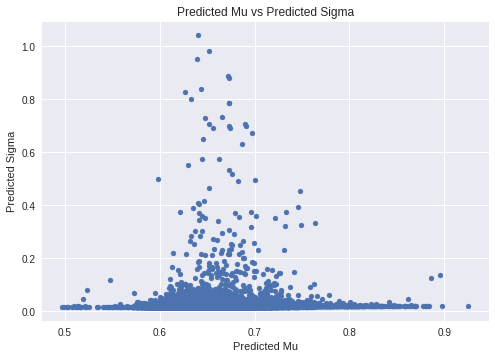

In [35]:
#note: useless graph, this literally serves no purpose
plt.style.use('seaborn')
plt.title("Predicted Mu vs Predicted Sigma")
plt.xlabel("Predicted Mu")
plt.ylabel("Predicted Sigma");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25);

In [36]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(8192,)

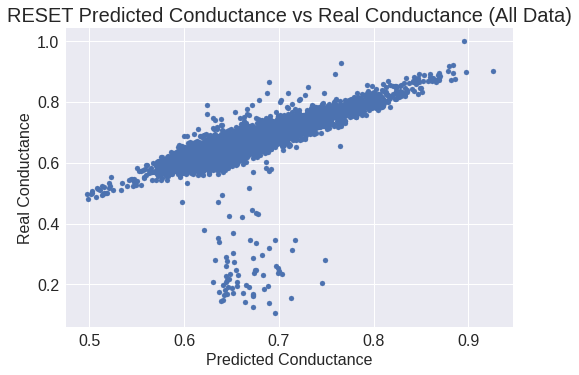

In [37]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (All Data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [38]:
#CORRELATION COEFFICIENT
import numpy as np
x = np.array(mu_variable.cpu().detach().numpy()[:,0])
y = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x,y)

array([[1.        , 0.74082686],
       [0.74082686, 1.        ]])

#Color Graphs

1209
0
6983


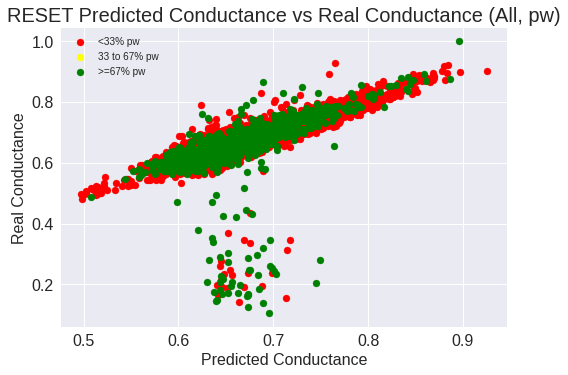

In [39]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]>=0.67):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (0.33<X_test[i][1]>0.67):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (All, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x3, y3, c="red", label='<33% pw')
plt.scatter(x2, y2, c="yellow", label='33 to 67% pw')
plt.scatter(x1, y1, c="green", label='>=67% pw')
plt.legend()

5712
0
2480


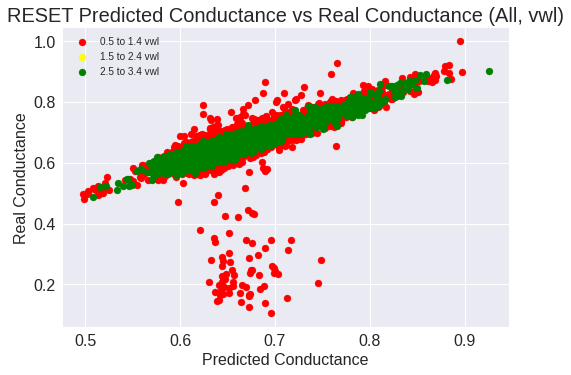

In [40]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2]>=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2]>=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (All, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

2691
2759
2742


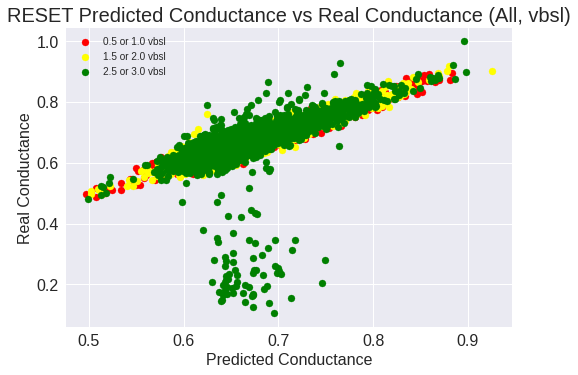

In [41]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (All, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()

#50 PERCENT

In [42]:
subtr_df = data[np.abs(data['scaled_preread'] - data['scaled_postread']) >= 0.5]
subtr_df

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
1031,2062,0.000001,2.6,3.0,0.000109,0.000030,0.5,0.691218,0.180216
2507,5014,0.000002,3.2,3.0,0.000105,0.000027,1.0,0.663793,0.162619
3737,7474,0.000002,2.7,3.0,0.000130,0.000049,1.0,0.827710,0.295034
3766,7532,0.000002,3.2,2.5,0.000106,0.000024,1.0,0.675082,0.145444
5015,10030,0.000002,3.0,3.0,0.000113,0.000034,1.0,0.720079,0.207235
5039,10078,0.000002,3.4,3.0,0.000102,0.000020,1.0,0.646935,0.117833
6293,12586,0.000002,3.3,3.0,0.000104,0.000021,1.0,0.662587,0.125794
7559,15118,0.000002,3.4,3.0,0.000116,0.000029,1.0,0.736180,0.177681
8621,17242,0.000001,3.1,3.0,0.000107,0.000021,0.5,0.681467,0.128580
10043,20086,0.000002,2.8,3.0,0.000109,0.000028,1.0,0.693139,0.167364


In [43]:
# Train-test 70%-30% split
x = subtr_df[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = subtr_df["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [44]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [45]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.3759],
        [0.2176],
        [0.5316],
        [0.7065],
        [0.7228],
        [0.2182],
        [0.3221],
        [0.1473],
        [0.3950],
        [0.3541],
        [0.2324],
        [0.3879],
        [0.1240]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.6959],
        [0.7179],
        [0.6729],
        [0.6896],
        [0.7047],
        [0.6643],
        [0.7862],
        [0.6676],
        [0.7455],
        [0.6839],
        [0.6731],
        [0.7109],
        [0.6479]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [46]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(np.sqrt(squared_error.item()))

0.5243546423342944


In [47]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([0.6479], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([0.7862], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.1046, device='cuda:0', dtype=torch.float64)
tensor(0.2792, device='cuda:0', dtype=torch.float64)
13
13


In [48]:
print((mu_variable-y_test_tensor).shape)

torch.Size([13, 13])


In [49]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(13,)

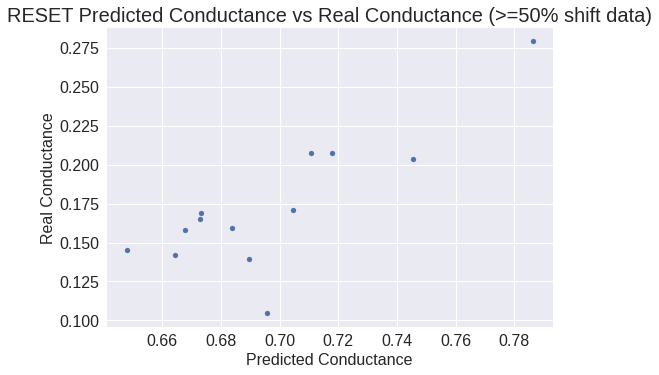

In [50]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (>=50% shift data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [51]:
#CORRELATION COEFFICIENT
import numpy as np
x2 = np.array(mu_variable.cpu().detach().numpy()[:,0])
y2 = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x2,y2)

array([[1.        , 0.81018803],
       [0.81018803, 1.        ]])

#Color Graphs

10
0
3


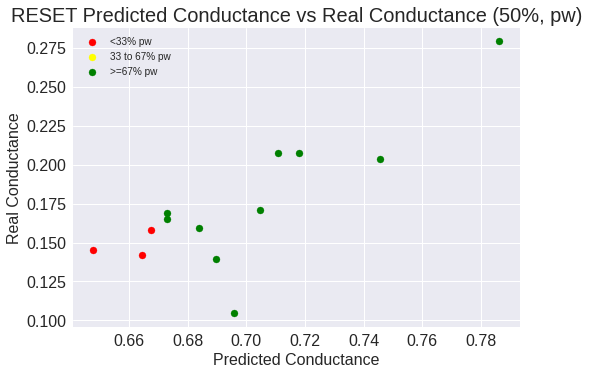

In [52]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]>=0.67):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (0.33<X_test[i][1]>0.67):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (50%, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x3, y3, c="red", label='<33% pw')
plt.scatter(x2, y2, c="yellow", label='33 to 67% pw')
plt.scatter(x1, y1, c="green", label='>=67% pw')
plt.legend()

13
0
0


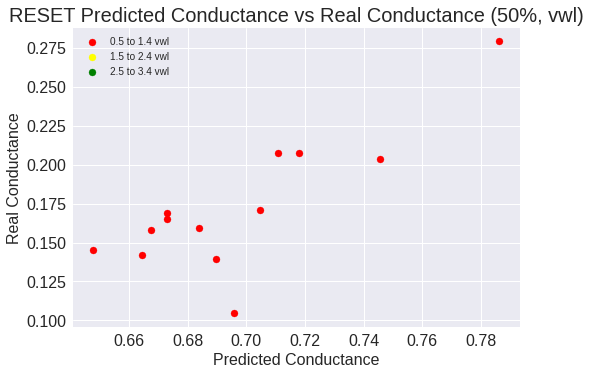

In [53]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2]>=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2]>=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (50%, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

0
0
13


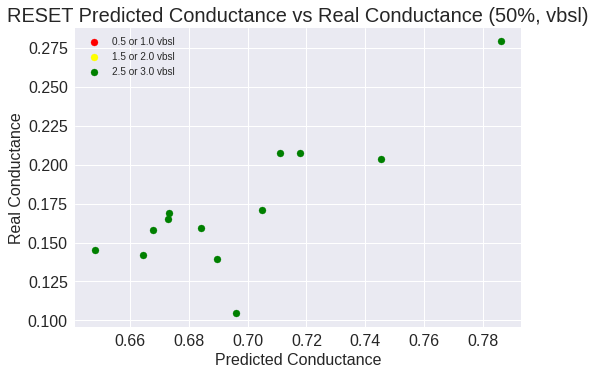

In [54]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (50%, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()

#5 PERCENT

In [55]:
ten_df = data[np.abs(data['scaled_preread'] - data['scaled_postread']) <= 0.05]
ten_df

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
1,2,2.000000e-08,0.5,1.0,0.000101,0.000102,0.01,0.643531,0.613218
2,4,2.000000e-08,0.5,1.5,0.000102,0.000101,0.01,0.649740,0.609075
3,6,2.000000e-08,0.5,2.0,0.000105,0.000107,0.01,0.664560,0.643509
4,8,2.000000e-08,0.5,2.5,0.000104,0.000102,0.01,0.661585,0.612947
5,10,2.000000e-08,0.5,3.0,0.000098,0.000099,0.01,0.625358,0.595400
...,...,...,...,...,...,...,...,...,...
32763,65526,2.000000e-08,0.5,2.0,0.000132,0.000131,0.01,0.835563,0.789033
32764,65528,2.000000e-08,0.5,2.5,0.000106,0.000105,0.01,0.670208,0.635221
32765,65530,2.000000e-08,0.5,3.0,0.000101,0.000101,0.01,0.641972,0.606192
32766,65532,2.000000e-08,0.6,0.5,0.000108,0.000110,0.01,0.687521,0.663920


In [56]:
# Train-test 75%-25% split
x = ten_df[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = ten_df["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [57]:
x_train_tensor = torch.from_numpy(X_train).cuda()
y_train_tensor = torch.from_numpy(y_train).cuda()
x_train_variable = Variable(x_train_tensor)
y_train_variable = Variable(y_train_tensor, requires_grad=False)

x_test_tensor = torch.from_numpy(X_test).cuda()
y_test_tensor = torch.from_numpy(y_test).cuda()
x_test_variable = Variable(x_test_tensor)
y_test_variable = Variable(y_test_tensor)

In [58]:
network.eval()
output = network(x_test_tensor.float())
print(output)

(tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<SoftmaxBackward0>), tensor([[0.0168],
        [0.0174],
        [0.0176],
        ...,
        [0.0413],
        [0.0169],
        [0.0164]], device='cuda:0', grad_fn=<ExpBackward0>), tensor([[0.6097],
        [0.6524],
        [0.6913],
        ...,
        [0.5460],
        [0.6188],
        [0.6052]], device='cuda:0', grad_fn=<AddmmBackward0>))


In [59]:
pi_variable, sigma_variable, mu_variable = network(x_test_tensor.float())

squared_error = (((mu_variable[:,0] - y_test_tensor)*(mu_variable[:,0] - y_test_tensor))/len(mu_variable)).sum().data
print(squared_error)
print(np.sqrt(squared_error.item()))

tensor(0.0003, device='cuda:0', dtype=torch.float64)
0.016835217898552093


In [60]:
print(min(mu_variable))
print(max(mu_variable))
print(min(y_test_tensor))
print(max(y_test_tensor))
print(len(mu_variable))
print(len(y_test_tensor))

tensor([0.4815], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor([0.9012], device='cuda:0', grad_fn=<UnbindBackward0>)
tensor(0.4648, device='cuda:0', dtype=torch.float64)
tensor(0.9318, device='cuda:0', dtype=torch.float64)
6634
6634


In [61]:
print((mu_variable-y_test_tensor).shape)

torch.Size([6634, 6634])


In [62]:
sigma_variable.cpu().detach().numpy()[:,0].shape

(6634,)

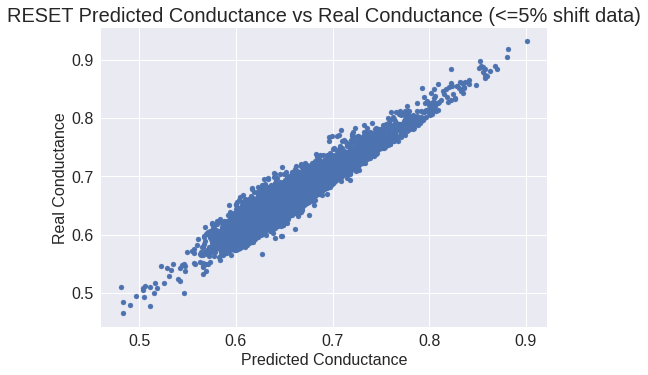

In [63]:
ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (<=5% shift data)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");
plt.scatter(mu_variable.cpu().detach().numpy()[:,0], y_test_tensor.cpu().detach().numpy(), s=25);
#plt.scatter(mu_variable.cpu().detach().numpy()[:,0], sigma_variable.cpu().detach().numpy()[:,0], s=25, 'r');

In [64]:
#CORRELATION COEFFICIENT
import numpy as np
x3 = np.array(mu_variable.cpu().detach().numpy()[:,0])
y3 = np.array(y_test_tensor.cpu().detach().numpy())
np.corrcoef(x3,y3)

array([[1.        , 0.95039013],
       [0.95039013, 1.        ]])

#Color Graphs

883
0
5751


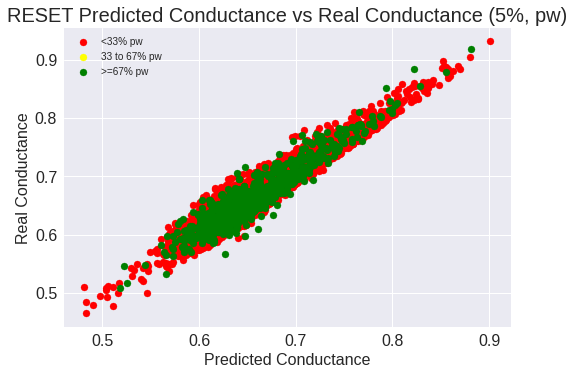

In [65]:
#pulse width

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][1]>=0.67):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (0.33<X_test[i][1]>0.67):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (5%, pw)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#different color points
plt.scatter(x3, y3, c="red", label='<33% pw')
plt.scatter(x2, y2, c="yellow", label='33 to 67% pw')
plt.scatter(x1, y1, c="green", label='>=67% pw')
plt.legend()

4585
0
2049


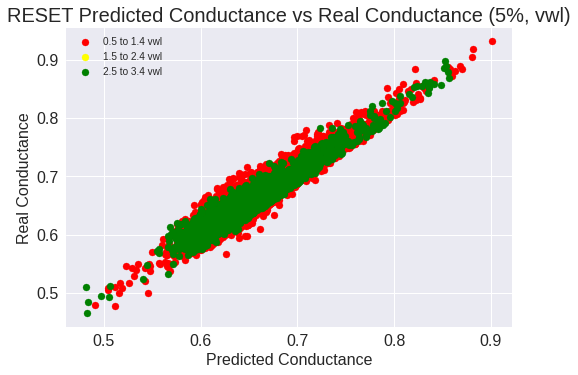

In [66]:
#vwl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (0.5<=X_test[i][2]>=1.4):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (1.4<X_test[i][2]>=2.4):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (5%, vwl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 to 1.4 vwl')
plt.scatter(x2, y2, c="yellow", label='1.5 to 2.4 vwl')
plt.scatter(x3, y3, c="green", label='2.5 to 3.4 vwl')
plt.legend()

2211
2181
2242


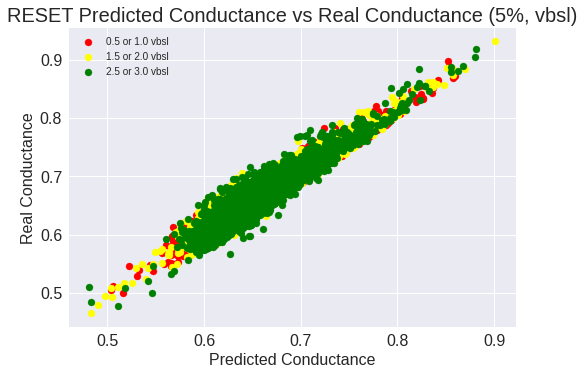

In [67]:
#vbsl

x1 = []
x2 = []
y1 = []
y2 = []
x3 = []
y3 = []

#sort out data into two lists
for i in range(len(mu_variable.cpu().detach().numpy()[:,0])):
  if (X_test[i][3]==0.5 or X_test[i][3]==1.0):
      x1.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y1.append(y_test_tensor.cpu().detach().numpy()[i])
  elif (X_test[i][3]==1.5 or X_test[i][3]==2.0):
      x2.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y2.append(y_test_tensor.cpu().detach().numpy()[i])
  else:
      x3.append(mu_variable.cpu().detach().numpy()[:,0][i])
      y3.append(y_test_tensor.cpu().detach().numpy()[i])

print(len(x1))
print(len(x2))
print(len(x3))

ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.style.use('seaborn')
plt.title("RESET Predicted Conductance vs Real Conductance (5%, vbsl)", fontsize=20)
plt.xlabel("Predicted Conductance")
plt.ylabel("Real Conductance");

#one green and other red
plt.scatter(x1, y1, c="red", label='0.5 or 1.0 vbsl')
plt.scatter(x2, y2, c="yellow", label='1.5 or 2.0 vbsl')
plt.scatter(x3, y3, c="green", label='2.5 or 3.0 vbsl')
plt.legend()